# Задача 6

In [4]:
import numpy as np

In [2]:
def woodbury(a,u,v):
    A_inv = np.linalg.inv(a)
    C_inv = np.eye(v.shape[0])
    return A_inv - A_inv @ u @ np.linalg.inv(C_inv + v @ A_inv @ u) @ v @ A_inv

In [3]:
def standard_inv(a,u,v):
    return np.linalg.inv(a + u @ v)

In [4]:
p=5000
k=100

In [7]:
a=np.diag(np.random.rand(p))
u=np.random.rand(p,k)
v=np.random.rand(k,p)

In [14]:
%time inv_w = woodbury(a,u,v)

Wall time: 1min 15s


In [15]:
%time inv = standard_inv(a,u,v)

Wall time: 43.2 s


In [16]:
np.allclose(inv, inv_w)

True

Результаты программ одинаковы, однако woodbury занимает дольше времени, поскольку производится значительно больше операций (2 операции на поиск обратной матрицы, 6 операций умножения матриц и 2 операции сложения) по сравнению со стандартной функцией (по 1 операции на каждый вид)

# Задача 7

In [1]:
import numpy as np

In [2]:
with np.load('data_distance_svd.npz') as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

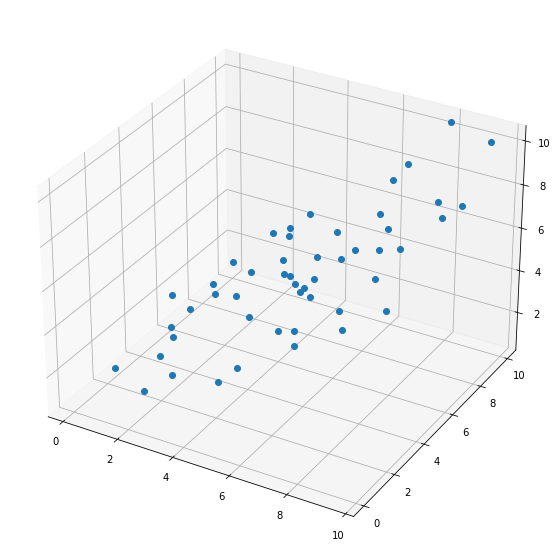

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot(xp,yp,zp,'o');

In [9]:
c = np.array([xp,yp,zp]).mean(axis=1)

In [10]:
c

array([5.22542843, 5.14182973, 5.28888182])

In [23]:
N=len(xp)
A = np.hstack((xp.reshape(N,1),yp.reshape(N,1),zp.reshape(N,1)))

In [24]:
A = A - c

In [26]:
U, E, VT = np.linalg.svd(A)

||An||^2->min

||U@E@VT@n||^2->min

U(NxN) - ортогональная, значит, не влияет на модуль поворачиваемого вектора

||E@VT@n||^2->min

E(Nx3) = diag(s1,s2,s3)

y = VT @ n

(s1y1)^2 + (s2y2)^2 + (s3y3)^2 -> min

y = (0,0,1) - т.к. s1 >= s2 >= s3

n = VT^(-1)y

In [31]:
n = np.linalg.inv(VT)[:,-1]

$(x-c_1)*n_1 + (y-c_2)*n_2 + (z-c_3)*n_3 = 0$

$z = - \frac{1}{n_3} ((x-c_1)*n_1 + (y-c_2)*n_2) + c_3$

In [35]:
x, y = np.meshgrid(np.linspace(0,10,11),np.linspace(0,10,11))
z = - ((x - c[0]) * n[0] + (y - c[1]) * n[1]) / n[2] + c[2]


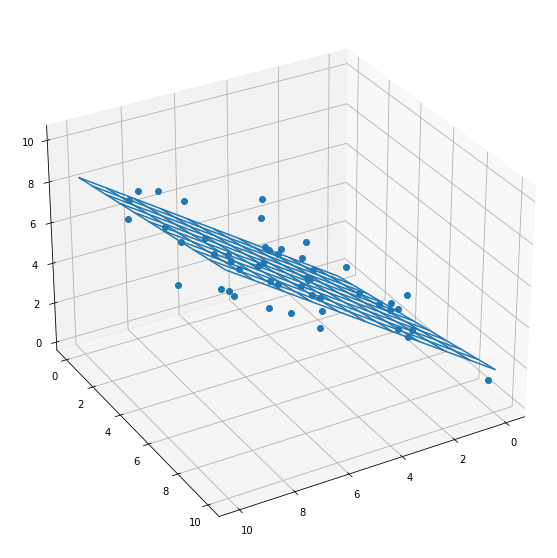

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot(xp,yp,zp,'o');
ax.plot_wireframe(x,y,z);
ax.view_init(30, 60)
plt.draw()

Получилось!

# Задача 8

In [41]:
def procrustes(a, b):
    M = a.T @ b
    U, D, VT = np.linalg.svd(M)
    R = U @ VT
    mod_b = b @ R.T
    return mod_b

In [54]:
data = np.loadtxt('signatureData2.csv', delimiter=',')

In [44]:
data.shape

(96, 4)

In [55]:
data1, data2 = data[:,:2], data[:,2:]

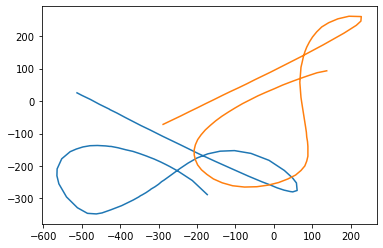

In [57]:
plt.plot(data1[:,0], data1[:,1]);
plt.plot(data2[:,0], data2[:,1]);

In [58]:
data1 -= data1.mean(axis=0)
data2 -= data2.mean(axis=0)

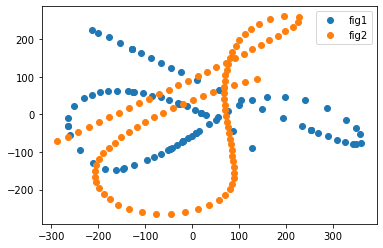

In [63]:
plt.plot(data1[:,0], data1[:,1],'o', label='fig1')
plt.plot(data2[:,0], data2[:,1],'o', label='fig2')
plt.legend();

In [67]:
data1_new = procrustes(data2,data1)

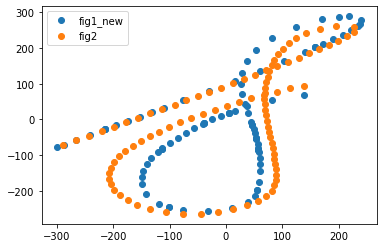

In [68]:
plt.plot(data1_new[:,0], data1_new[:,1],'o', label='fig1_new')
plt.plot(data2[:,0], data2[:,1],'o', label='fig2')
plt.legend();